In [81]:
import pandas as pd
import numpy as np

In [82]:
df=pd.read_csv("https://raw.githubusercontent.com/singhrau0/Big-Data-Preprocessing/main/titanic_dataset.csv")

In [83]:
y=df['Survived']
x=df[["Pclass","Fare"]]

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=333,stratify=y)

In [85]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [86]:
lr.fit(x_train,y_train)

LogisticRegression()

In [87]:
lr.score(x_train,y_train)

0.6783707865168539

In [88]:
x.isnull().sum()

Pclass    0
Fare      0
dtype: int64

In [89]:
import seaborn as sns

<Axes: >

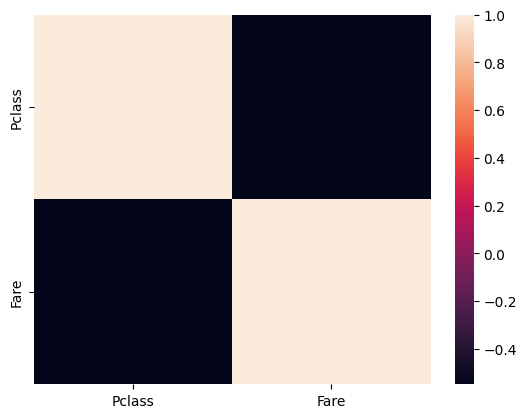

In [90]:
sns.heatmap(x.corr())

In [91]:
x.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


In [92]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler()

In [93]:
x_train["Fare"]=min.fit_transform(x_train[["Fare"]])

In [94]:
lr1=LogisticRegression()
lr1.fit(x_train,y_train)

LogisticRegression()

In [95]:
lr1.score(x_train,y_train)

0.6783707865168539

In [96]:
pred=lr1.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

Confusion matrixs

In [130]:
class Confusion:
    def __init__(self,actual,pred): 
        self.actual=actual
        self.pred=pred
    def classificationreport(self):
        self.TP=0    
        self.TN=0 
        self.FP=0 
        self.FN=0 
        for i ,j in zip(self.actual,self.pred):
            if i==1 and j==1:
                self.TP+=1 
            if i==0 and j==0:
                self.TN+=1 
            if i==1 and j==0:
                self.FN+=1 
            if i==0 and j==1:
                self.FP+=1 
        print(f'True positive {self.TP},False Positive {self.FP} /n,false Negative {self.FN},True Negative {self.TN}') 
    def precision(self):
        self.pre=self.TP/(self.TP+self.FP)
        return self.pre
    def recall(self):
        self.rec=self.TP/(self.TP+self.FN)
        return self.rec
    def fScore(self):
        f=(2*(self.pre*self.rec))/(self.pre+self.rec)
        return f
               
                

In [131]:
obj=Confusion(y_test,pred)
obj.classificationreport()

True positive 68,False Positive 107 /n,false Negative 1,True Negative 3


In [132]:
obj.precision()

0.38857142857142857

In [133]:
obj.recall()

0.9855072463768116

In [134]:
obj.fScore()

0.5573770491803278

Movie dataset

In [ ]:
mv=pd.read_csv("https://raw.githubusercontent.com/singhrau0/Big-Data-Preprocessing/main/Movie_Data.csv")

In [ ]:
mv.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0,2.266667
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0,2.106667
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1,2.980000
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0,2.893333
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0,3.080000


In [ ]:
mv.isnull().sum()

Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Avg_age_actors         0
Num_multiplex          0
3D_available           0
Genre_Thriller         0
Genre_Drama            0
Genre_Comedy           0
Collection             0
dtype: int64

In [ ]:
y=mv["Collection"]
x=mv.drop(columns="Collection",axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=333)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=lr.predict(x_test)
pred

array([2.17455693, 2.74118801, 2.48465088, 2.16264586, 2.32888412,
       2.41536534, 3.09606347, 2.06079242, 2.3154476 , 2.38944413,
       2.80082075, 2.71672937, 1.8916015 , 2.98472447, 2.30872192,
       1.05995162, 2.11075761, 1.89817281, 1.90946902, 1.80714441,
       1.99518591, 1.55319102, 2.3156995 , 1.99205918, 1.8220261 ,
       2.38556551, 1.89967009, 2.18380435, 2.2525369 , 2.14837311,
       2.27821908, 3.42308605, 3.22738595, 2.18885182, 2.86074179,
       2.42591596, 2.30967232, 1.90705623, 2.14584526, 2.97049829,
       2.91322277, 2.12411004, 2.28258102, 1.66767905, 1.93596571,
       2.43526063, 0.49497715, 2.20557054, 2.02290304, 3.12872263,
       2.46688194, 2.21880395, 2.03706979, 1.00830199, 1.74603489,
       2.54531661, 1.922481  , 2.05480831, 2.44862501, 2.20076185,
       2.20561058, 1.87589451, 1.15954082, 2.13534298, 2.65309643,
       2.33072539, 2.19121928, 2.65441101, 2.07552845, 1.89670529,
       1.56806886, 2.47077893, 2.54770615, 1.84280798, 2.41759

MeanSqured Error

In [ ]:
def MSE(y_test,pred):
    meanSqured=(sum(y_test-pred)**2)/(len(y_test))
    return meanSqured
meanEr=MSE(y_test,pred)
meanEr

0.0765773487843182

Mean Absolute Error

In [ ]:
def MSE(y_test,pred):
    meanAbsul=(sum(abs(y_test-pred)))/len(y_test)
    return meanAbsul
result=MSE(y_test,pred)
result

0.2721419933746532

In [ ]:
mn=y_test.mean()

Mean Total Error

In [ ]:
def MTE(y_test):
    meanAbsul=(y_test-y_test.mean())**2
    res=sum(meanAbsul)/len(y_test)
    return res
mte=MTE(y_test)
print(mte)

0.43590653595013074


In [ ]:
def MST(y_test):
    ls1=[]
    for i in y_test:
        se=(i-y_test.mean())**2
        mst=sum(se)/len(y_test)
    return mst
MeanTotalEr=MTE(y_test)
MeanTotalEr

0.43590653595013074

In [ ]:
R2=1-(meanEr/MeanTotalEr)
R2

0.8243262202586499

In [ ]:
AdjR2=1-((1-R2)*(len(y)-1))/((len(y)-x_test.shape[1])-1)
AdjR2

0.8174583152893379

In [ ]:
(len(y)-x_test.shape[1]-1)

486

In [ ]:
AdjR2

-4.57269942749279e+30

KNearestNeighbours

In [2]:
X1=[2,3,4,5]
X2=[4,22,4,6]
y=[1,2,3,3]

In [3]:
import math

In [4]:
class KNN:
    def __init__(self,X1,X2,y,k=3):  
        self.X1=X1
        self.X2=X2
        self.y=y
        self.k=k
    def distance(self):
        ls=[]
        for i,j in zip(self.X1,self.X2):
            for m,n in zip(self.X1,self.X2):
                    dist=math.sqrt((i-m)**2+(j-n)**2)
                    print(i,j,m,n)
                    ls.append(dist)
        return ls
   
obj=KNN(X1,X2,y)  
obj.distance()     

2 4 2 4
2 4 3 22
2 4 4 4
2 4 5 6
3 22 2 4
3 22 3 22
3 22 4 4
3 22 5 6
4 4 2 4
4 4 3 22
4 4 4 4
4 4 5 6
5 6 2 4
5 6 3 22
5 6 4 4
5 6 5 6


[0.0,
 18.027756377319946,
 2.0,
 3.605551275463989,
 18.027756377319946,
 0.0,
 18.027756377319946,
 16.1245154965971,
 2.0,
 18.027756377319946,
 0.0,
 2.23606797749979,
 3.605551275463989,
 16.1245154965971,
 2.23606797749979,
 0.0]

In [ ]:
X1=[2,3,4,5]
X2=[4,22,4,6]
y=[1,2,3,3]

In [38]:
df=pd.DataFrame({"X1":[2,3,4,5],"X2":[4,22,4,6],"y":[1,0,1,0]})

In [39]:
class KNN:
    def __init__(self,X1,X2,y,k=3):  
        self.X1=X1
        self.X2=X2
        self.y=y
        self.k=k
    def distance(self):
        ls=[]
        for i,j in zip(self.X1,self.X2):
            for a in range(1,len(self.X1)):
               m= self.X1[a]
               n= self.X2[a]
               dist=math.sqrt((i-j)**2+(m-n)**2)
               ls.append(dist)  
        return ls    
   
obj=KNN(X1,X2,y)  
obj.distance() 
          

[19.1049731745428,
 2.0,
 2.23606797749979,
 26.870057685088806,
 19.0,
 19.026297590440446,
 19.0,
 0.0,
 1.0,
 19.026297590440446,
 1.0,
 1.4142135623730951]

In [40]:
import pandas as pd

In [63]:
class KNN:
    def __init__(self,df,k=3): 
        self.df=df 
        self.k=k
    def distance(self):
        ls=[]
        for i,j in zip(self.df["X1"],self.df["X2"]):
            for a in range(len(self.df["X1"])):
              if self.df["X1"].index(i)!=a:
                m= self.df["X1"][a]
                n= self.df["X2"][a]
                dist=math.sqrt((i-j)**2+(m-n)**2)
                ls.append(dist)  
        return ls   
    def KNNRegressor(self,pred):
        ls1=[]
        for i,j in zip(self.df["X1"],self.df["X2"]):
            m,n=pred[0],pred[1]
            dist=(((i-m)**2)+((j-n)**2))**0.5
            ls1.append(dist)
        self.df["Distances"]=ls1
        self.df=self.df.sort_values(by="Distances",ascending=True)
        return  f"Prediction of {pred} is {self.df.iloc[:self.k]['y'].mean()}"
    def KNNClassifier(self,pred):
        ls1=[]
        for i,j in zip(self.df["X1"],self.df["X2"]):
            m,n=pred[0],pred[1]
            dist=(((i-m)**2)+((j-n)**2))**0.5
            ls1.append(dist)
        self.df["Distances"]=ls1
        self.df=self.df.sort_values(by="Distances",ascending=True)
        print(df)
        return  f"Prediction of {pred} is {self.df.iloc[:self.k]['y'].mode()[0]}"
obj=KNN(df,3) 
obj.KNNClassifier(pred=(2,4))

   X1  X2  y  Distances
0   2   4  1   0.000000
1   3  22  0  18.027756
2   4   4  1   2.000000
3   5   6  0   3.605551


'Prediction of (2, 4) is 1'